In [1]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt


In [3]:
# Generate synthetic acceleration data (e.g., sinusoidal signal + noise)
fs = 250  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 seconds of data
acceleration = np.sin(2 * np.pi * 1 * t) + np.sin(2 * np.pi * 8 * t) + np.random.normal(0, 0.1, len(t))



In [4]:
# Design a bandpass Butterworth filter
def bandpass_filter(data, lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data)
    return filtered_data

In [14]:
# Filter the acceleration data
lowcut = 5  # Lower cutoff frequency (Hz)
highcut = 30.0  # Upper cutoff frequency (Hz)
filtered_acceleration = bandpass_filter(acceleration, lowcut, highcut, fs)

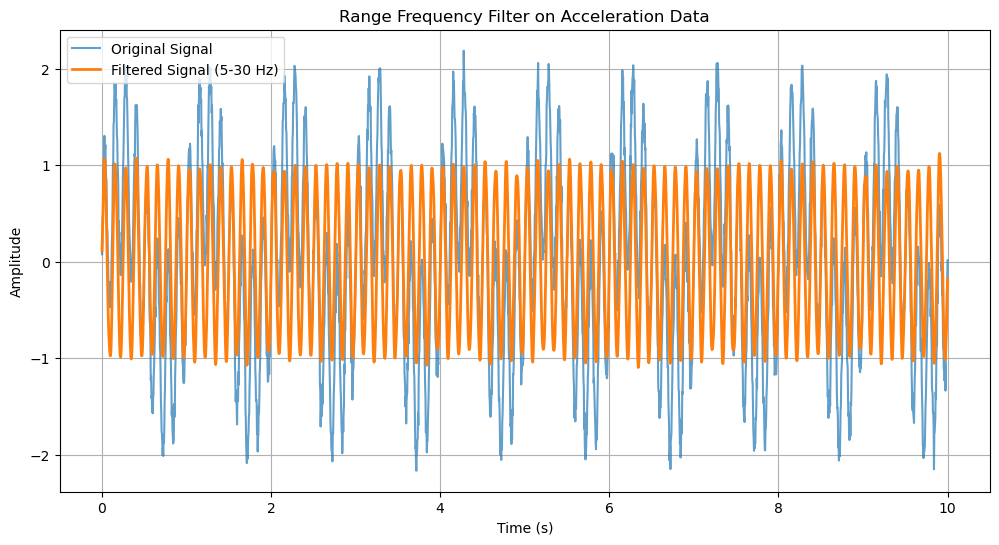

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(t, acceleration, label="Original Signal", alpha=0.7)
plt.plot(t, filtered_acceleration, label="Filtered Signal (5-30 Hz)", linewidth=2)
plt.title("Range Frequency Filter on Acceleration Data")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()